### Student Information
Name: 林冠廷

Student ID: 106012017

GitHub ID: DanielLin94144

---

### Instructions

1. First: do the **take home** exercises in the [DM2020-Lab1-Master Repo](https://github.com/fhcalderon87/DM2020-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2020-Lab1-Master Repo](https://github.com/fhcalderon87/DM2020-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fhcalderon87/DM2020-Lab1-Master/blob/master/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (Oct. 22th 11:59 pm, Thursday)__. 

In [106]:
### Begin Assignment Here

### 1. Take home exercise

In [107]:
# categories
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

In [108]:
# obtain the documents containing the categories provided
from sklearn.datasets import fetch_20newsgroups

twenty_train = fetch_20newsgroups(subset='train', categories=categories, \
                                  shuffle=True, random_state=42)

In [109]:
# target_name is the category's name
print(twenty_train.target_names[0])

alt.atheism


In [110]:
twenty_train.target[0] # label

1

In [111]:
import pandas as pd
# my functions
import helpers.data_mining_helpers as dmh
import helpers.text_analysis as dmh_text

In [112]:
# construct dataframe from a list
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])

In [113]:
# add category to the dataframe
X['category'] = twenty_train.target

In [114]:
# add category label also
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

In [115]:
X[:10]

,text,category,category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,3,soc.religion.christian
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,3,soc.religion.christian
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med
9,From: libman@hsc.usc.edu (Marlena Libman) Subj...,2,sci.med


In [116]:
# using iloc (by position)
'''index selection in .iloc, a convenient way to query your pandas'''
''' So that we can control the attribute (row and column) by indexing'''
''' output is another type of pandas, we can also use indexing to specify want we want'''
X.iloc[::10, 0:2][0:10]

,text,category
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1
10,From: anasaz!karl@anasazi.com (Karl Dussik) Su...,3
20,From: dotsonm@dmapub.dma.org (Mark Dotson) Sub...,3
30,From: vgwlu@dunsell.calgary.chevron.com (greg ...,2
40,From: david-s@hsr.no (David A. Sjoen) Subject:...,3
50,From: ab@nova.cc.purdue.edu (Allen B) Subject:...,1
60,From: Nanci Ann Miller <nm0w+@andrew.cmu.edu> ...,0
70,From: weaver@chdasic.sps.mot.com (Dave Weaver)...,3
80,From: annick@cortex.physiol.su.oz.au (Annick A...,2
90,Subject: Vonnegut/atheism From: dmn@kepler.unh...,0


In [117]:
# using loc (by label)
'''directly set by label name, name of the column you want to query'''
X.loc[::10, 'text'][0:10]

0     From: sd345@city.ac.uk (Michael Collier) Subje...
10    From: anasaz!karl@anasazi.com (Karl Dussik) Su...
20    From: dotsonm@dmapub.dma.org (Mark Dotson) Sub...
30    From: vgwlu@dunsell.calgary.chevron.com (greg ...
40    From: david-s@hsr.no (David A. Sjoen) Subject:...
50    From: ab@nova.cc.purdue.edu (Allen B) Subject:...
60    From: Nanci Ann Miller <nm0w+@andrew.cmu.edu> ...
70    From: weaver@chdasic.sps.mot.com (Dave Weaver)...
80    From: annick@cortex.physiol.su.oz.au (Annick A...
90    Subject: Vonnegut/atheism From: dmn@kepler.unh...
Name: text, dtype: object

### ** >>> Exercise 2 (take home):** 
Experiment with other querying techniques using pandas dataframes. Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more information. 

In [118]:
# Answer here
# use pandas .query('expression') can effectively query the dataframe according to your intentions.
X.query('index % 10 ==0')[:10]

,text,category,category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics
10,From: anasaz!karl@anasazi.com (Karl Dussik) Su...,3,soc.religion.christian
20,From: dotsonm@dmapub.dma.org (Mark Dotson) Sub...,3,soc.religion.christian
30,From: vgwlu@dunsell.calgary.chevron.com (greg ...,2,sci.med
40,From: david-s@hsr.no (David A. Sjoen) Subject:...,3,soc.religion.christian
50,From: ab@nova.cc.purdue.edu (Allen B) Subject:...,1,comp.graphics
60,From: Nanci Ann Miller <nm0w+@andrew.cmu.edu> ...,0,alt.atheism
70,From: weaver@chdasic.sps.mot.com (Dave Weaver)...,3,soc.religion.christian
80,From: annick@cortex.physiol.su.oz.au (Annick A...,2,sci.med
90,Subject: Vonnegut/atheism From: dmn@kepler.unh...,0,alt.atheism


In [119]:
X.isnull().apply(lambda x: dmh.check_missing_values(x))

,text,category,category_name
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0


In [120]:
dummy_series = pd.Series(["dummy_record", 1], index=["text", "category"])

In [121]:
result_with_series = X.append(dummy_series, ignore_index=True)

In [122]:
result_with_series.isnull().apply(lambda x: dmh.check_missing_values(x))

,text,category,category_name
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,1


### >>> **Exercise 5 (take home)** 
There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

Please check the data and the process below, describe what you observe and why it happened.   
$Hint$ :  why `.isnull()` didn't work?

In [123]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

,id,missing_example
0,A,NaN
1,B,NaN
2,C,NaN
3,D,None
4,E,None
5,F,


In [124]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

#### Answer here
* For pandas.isnull function, in [documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.isnull.html), It states that *values are missing (NaN in numeric arrays, None or NaN in object arrays, NaT in datetimelike).*
* So by the above definition, pandas.isnull() can't detect 'Nan', 'None' and '' because they are actually **str type** of value.
* This exercise remind us of taking care of different Nan types, since others may use 'Nan', 'None' and '' to record their data, and we should be aware of the potential of these other kinds of Nan.




In [125]:
X_sample = X.sample(n=1000) #random state

In [126]:
X.shape

(2257, 3)

In [127]:
X_sample.shape

(1000, 3)

In [128]:
X.head()

,text,category,category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian


In [129]:
X_sample.head()

,text,category,category_name
2206,From: jsledd@ssdc.sas.upenn.edu (James Sledd) ...,3,soc.religion.christian
1611,From: john@goshawk.mcc.ac.uk (John Heaton) Sub...,1,comp.graphics
708,From: smithmc@mentor.cc.purdue.edu (Lost Boy) ...,2,sci.med
2230,From: news@cbnewsk.att.com Subject: Re: Bible ...,3,soc.religion.christian
372,From: young@is.s.u-tokyo.ac.jp (YOUNG Shio Hon...,1,comp.graphics


### >>> Exercise 6 (take home):
Notice any changes to the `X` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`. Feel free to query and look more closely at the dataframe for these changes.

#### My Answer
* After sampling, the dataset size is reduced to n, which is 1000.
* The index order is not sorted after sampling because of random sampling process.


In [130]:
import matplotlib.pyplot as plt
%matplotlib inline

### >>> **Exercise 8 (take home):** 
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for. 

In [131]:
X.category_name.value_counts()

soc.religion.christian    599
sci.med                   594
comp.graphics             584
alt.atheism               480
Name: category_name, dtype: int64

In [132]:
x = list(X.category_name.value_counts())
x_sample = list(X_sample.category_name.value_counts())

In [133]:
print(X_sample.columns)

Index(['text', 'category', 'category_name'], dtype='object')


<AxesSubplot:title={'center':'Category distribution'}>

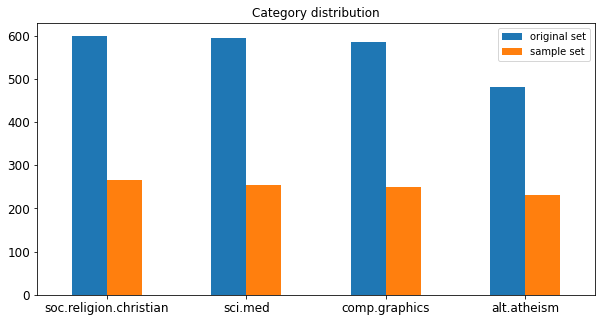

In [134]:
index = ['soc.religion.christian','sci.med','comp.graphics','alt.atheism']
df = pd.DataFrame({'original set':x, 'sample set':x_sample}, index = index)
df.plot(kind = 'bar',
       title = 'Category distribution', 
       rot = 0, fontsize = 12, figsize = (10,5))

In [135]:
import nltk

In [136]:
X['unigrams'] = X['text'].apply(lambda x: dmh.tokenize_text(x))

In [137]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text)

In [138]:
analyze = count_vect.build_analyzer()
analyze("Hello World!")

['hello', 'world']

In [139]:
X_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

### **>>> Exercise 10 (take home):**
We said that the `1` at the beginning of the fifth record represents the `00` term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [140]:
X_counts[4, 0:100].toarray()

array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int64)

In [141]:
idx = np.where(X_counts[4, 0:100].toarray()==1)

In [142]:
print('another word index:', idx[1][1])

another word index: 37


In [143]:
count_vect.get_feature_names()

['00',
 '000',
 '0000',
 '0000001200',
 '000005102000',
 '0001',
 '000100255pixel',
 '00014',
 '000406',
 '0007',
 '000usd',
 '0010',
 '001004',
 '0010580b',
 '001125',
 '001200201pixel',
 '0014',
 '001642',
 '00196',
 '002',
 '0028',
 '003258u19250',
 '0033',
 '0038',
 '0039',
 '004021809',
 '004158',
 '004627',
 '0049',
 '00500',
 '005148',
 '00630',
 '008561',
 '0094',
 '00am',
 '00index',
 '00pm',
 '01',
 '0100',
 '010116',
 '010702',
 '011255',
 '011308pxf3',
 '011605',
 '011720',
 '012019',
 '012536',
 '012946',
 '013',
 '013034',
 '0131',
 '013423tan102',
 '013657',
 '0138',
 '013846',
 '0150',
 '015518',
 '01580',
 '015931',
 '01720',
 '01752',
 '0179',
 '01821',
 '01830',
 '0184',
 '01852',
 '01854',
 '01890',
 '0195',
 '0199',
 '01a',
 '01wb',
 '02',
 '020',
 '0200',
 '020504',
 '020637',
 '020646',
 '020701tan102',
 '020751',
 '02115',
 '02118',
 '02139',
 '02142',
 '02154',
 '02160',
 '021635',
 '021708',
 '02173',
 '0223',
 '02254',
 '022621tan102',
 '023044',
 '0235',
 '0

#### My answer
* use .get_feature_names() function can know the corresponding feature name.

In [144]:
print('Another word in 5-th document: ', count_vect.get_feature_names()[idx[1][1]])

Another word in 5-th document:  01


In [145]:
import seaborn as sns

### **>>> Exercise 11 (take home):** 
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with frequency of `1` in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

In [146]:
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names()]
plot_y = ["doc_"+ str(i) for i in list(X.index)]
plot_z = X_counts[:, :].toarray()

In [147]:
df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
df_todraw

,term_00,term_000,term_0000,term_0000001200,term_000005102000,term_0001,term_000100255pixel,term_00014,term_000406,term_0007,...,term_zvi,term_zvonko,term_zwart,term_zyeh,term_zyklon,term_zyxel,term_zz,term_zzz,term_ªl,term_íålittin
doc_0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
doc_1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
doc_2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
doc_3,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,0
doc_4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
doc_2252,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
doc_2253,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
doc_2254,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
doc_2255,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [148]:
X_counts.shape

(2257, 35788)

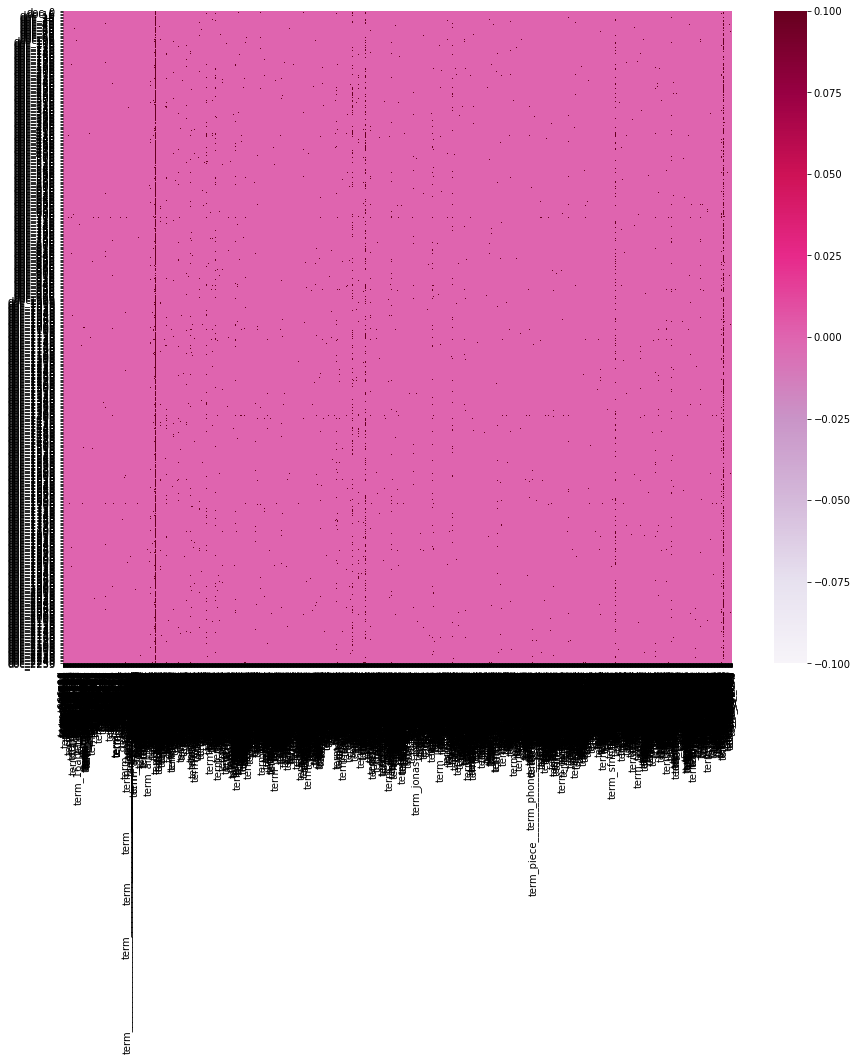

In [149]:
import seaborn as sns
plt.subplots(figsize=(15, 12))
ax = sns.heatmap(df_todraw, xticklabels=10, yticklabels=5, robust = True, 
                 cmap="PuRd")

### >>> Exercise 12 (take home):
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

$Hint$: you can refer to Axes3D in the documentation.

In [150]:
from sklearn.decomposition import PCA
X_reduced = PCA(n_components = 3).fit_transform(X_counts.toarray())

In [151]:
X_reduced.shape

(2257, 3)

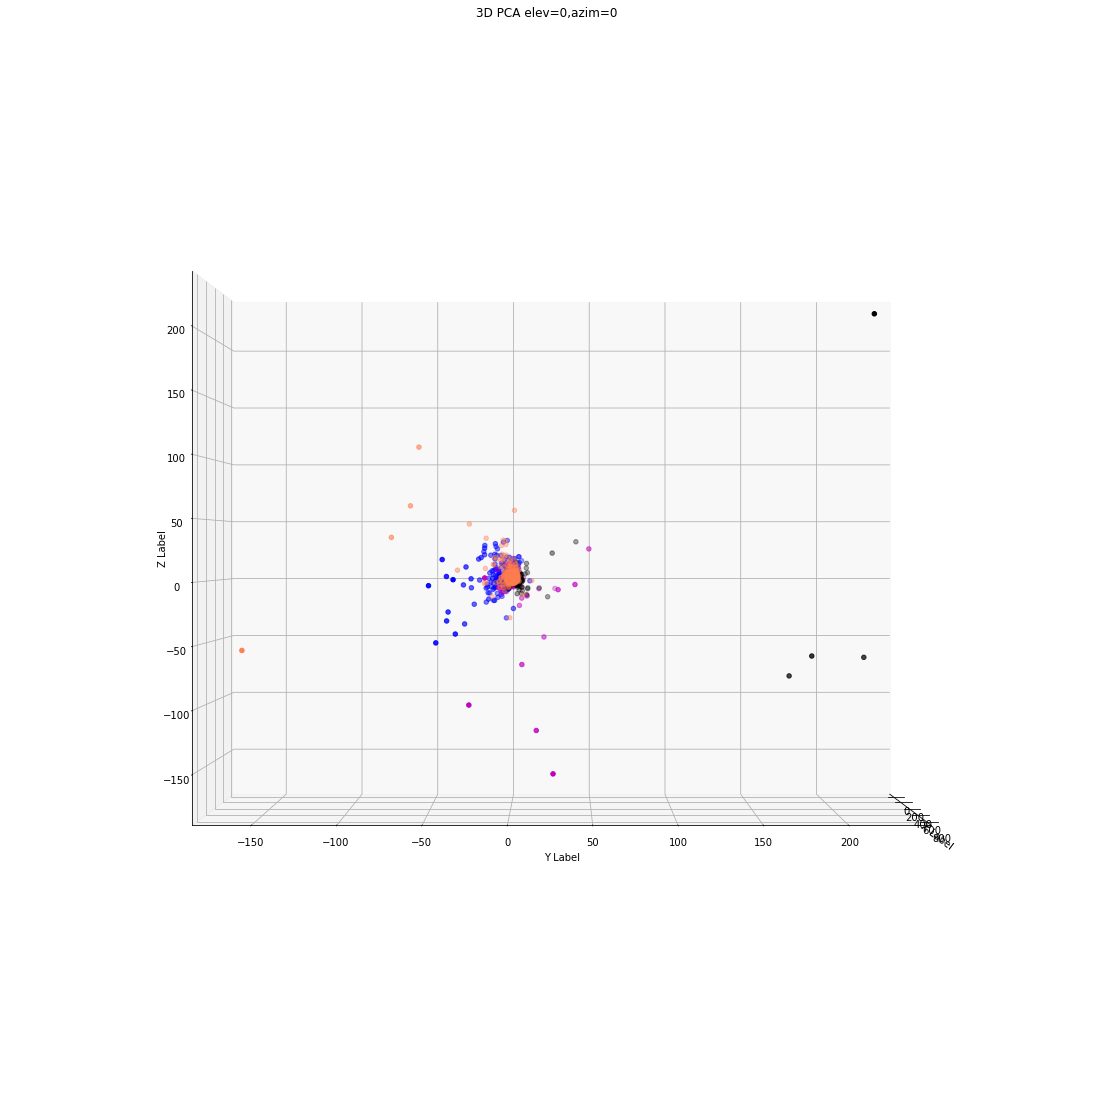

In [152]:
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure(figsize=(15, 15))
ax=Axes3D(fig)
col = ['coral', 'blue', 'black', 'm']
for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
    zs = X_reduced[X['category_name'] == category].T[2]
    ax.scatter3D(xs, ys, zs, c=c)

ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')
ax.view_init(elev=0,azim=0)
plt.title('3D PCA elev=0,azim=0')
plt.show()

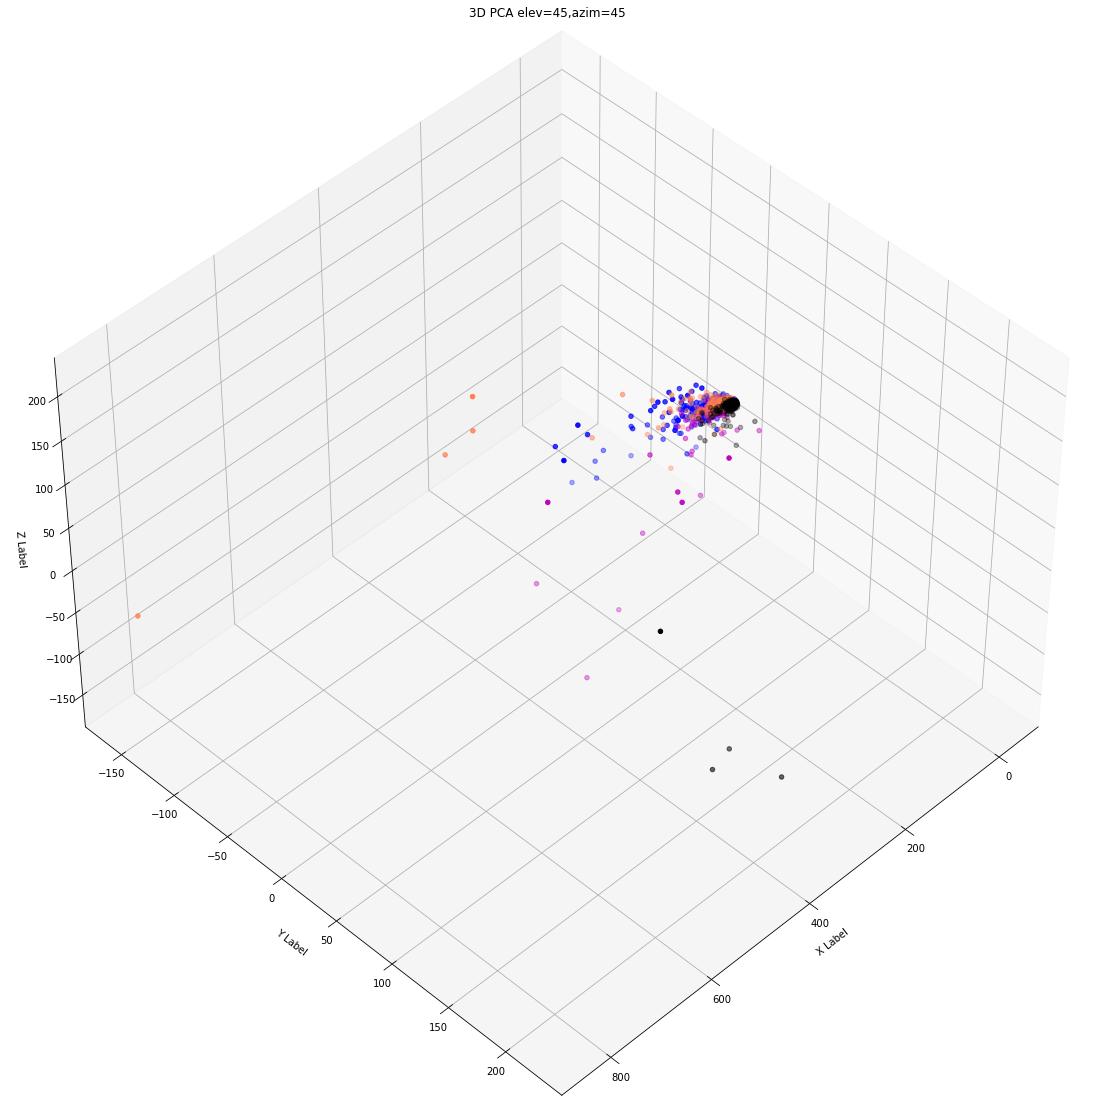

In [153]:
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure(figsize=(15, 15))
ax=Axes3D(fig)
col = ['coral', 'blue', 'black', 'm']
for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
    zs = X_reduced[X['category_name'] == category].T[2]
    ax.scatter3D(xs, ys, zs, c=c)

ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')
ax.view_init(elev=45,azim=45)
plt.title('3D PCA elev=45,azim=45')
plt.show()

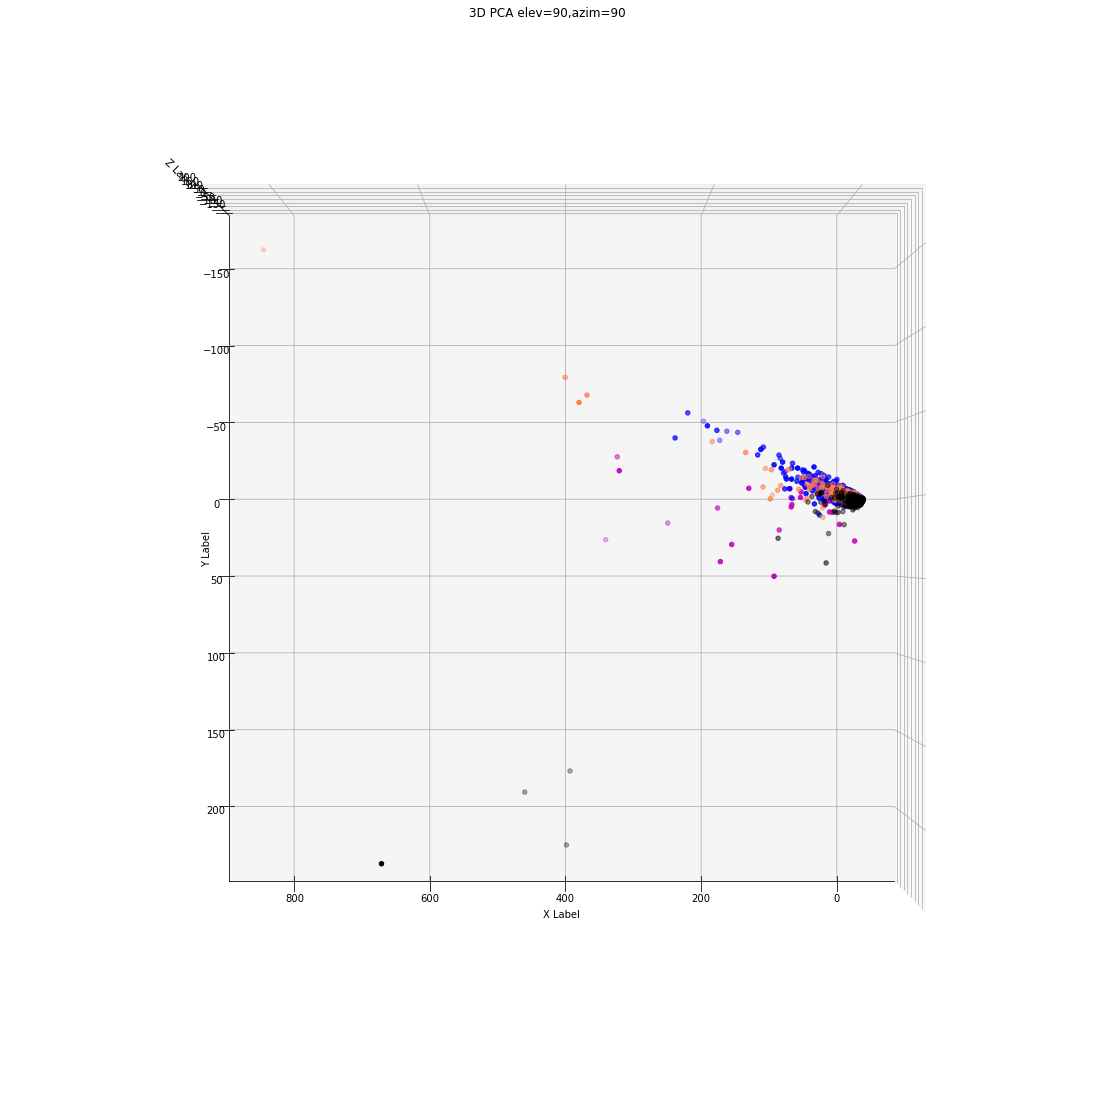

In [154]:
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure(figsize=(15, 15))
ax=Axes3D(fig)
col = ['coral', 'blue', 'black', 'm']
for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
    zs = X_reduced[X['category_name'] == category].T[2]
    ax.scatter3D(xs, ys, zs, c=c)

ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')
ax.view_init(elev=90,azim=90)
plt.title('3D PCA elev=90,azim=90')
plt.show()

#### My answer
* By observing from different angle, we can find that sometimes all the different class data mix and can't seperate them. However, sometimes you may find an angle that can easily seperate different class data, such as the first plot in my trials.

In [155]:
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))

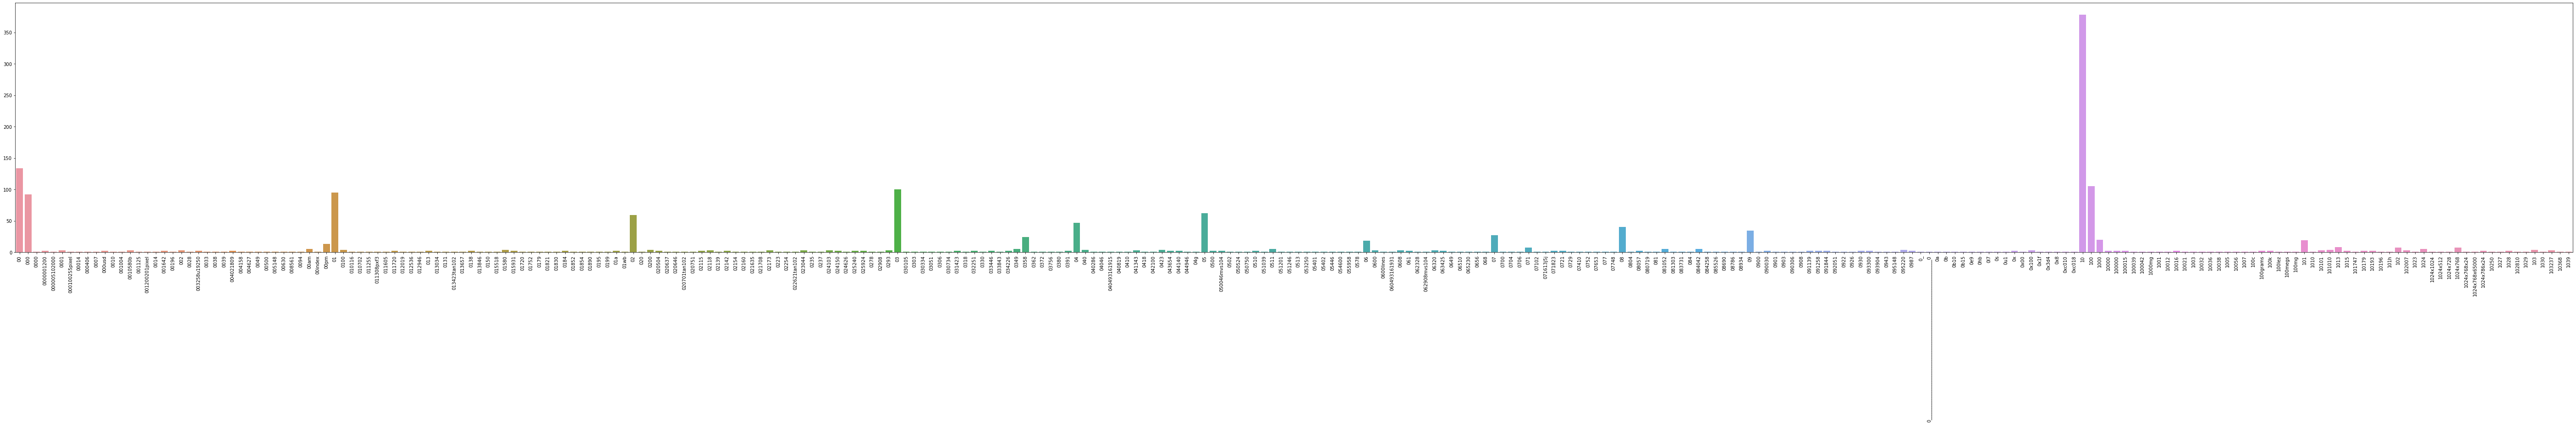

In [156]:
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names()[:300], rotation = 90);

### >>> **Exercise 13 (take home):**
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.

In [157]:
import plotly.graph_objs as go
df = pd.DataFrame({'term': count_vect.get_feature_names()[:300],'frequency': term_frequencies[:300]})

fig = go.Figure([go.Bar(x=df['term'], y=df['frequency'])])
# need to set x-axis type to be 'category' or can't show bar
fig.layout.xaxis.type = 'category'
fig.layout.title.text = 'Nicer interactive visualization by plotly' 
fig.show()

### >>> **Exercise 14 (take home):** 
The chart above contains all the vocabulary, and it's computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise. 


#### My answer 
* Since we care more about high frequency terms, so I think we can reduce the number of terms by setting a threshold, only plot the terms that their frequency is above the threshold.
* By doing so, we can plot a meaningful visualization plot very efficiently.

In [158]:
df = pd.DataFrame({'term': count_vect.get_feature_names()[:300],'frequency': term_frequencies[:300]})
df_reduced = df.query('frequency > 10')
fig = go.Figure([go.Bar(x=df_reduced['term'], y=df_reduced['frequency'])])
# need to set x-axis type to be 'category' or can't show bar
fig.layout.xaxis.type = 'category'
fig.layout.title.text = 'Efficient way to plot frequency-term visualization, frequency threshold = 30' 
fig.show()

### >>> **Exercise 15 (take home):** 
Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called [long tail](https://en.wikipedia.org/wiki/Long_tail) (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below

![alt txt](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Long_tail.svg/1000px-Long_tail.svg.png)

In [159]:
df = pd.DataFrame({'term': count_vect.get_feature_names()[:300],'frequency': term_frequencies[:300]})
df_sorted = df.sort_values(by = 'frequency', ascending = False)
fig = go.Figure([go.Bar(x=df_sorted['term'], y=df_sorted['frequency'])])
# need to set x-axis type to be 'category' or can't show bar
fig.layout.xaxis.type = 'category'
fig.layout.title.text = 'frequency-term visualization, frequency-based descending' 
fig.show()

### >>> **Exercise 16 (take home):**
Try to generate the binarization using the `category_name` column instead. Does it work?

In [160]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
mlb = preprocessing.LabelBinarizer()
mlb.fit(X.category)
mlb.classes_
X['bin_category'] = mlb.transform(X['category']).tolist()
X[0:9]

,text,category,category_name,unigrams,bin_category
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics,"[From, :, sd345, @, city.ac.uk, (, Michael, Co...","[0, 1, 0, 0]"
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics,"[From, :, ani, @, ms.uky.edu, (, Aniruddha, B....","[0, 1, 0, 0]"
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian,"[From, :, djohnson, @, cs.ucsd.edu, (, Darin, ...","[0, 0, 0, 1]"
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian,"[From, :, s0612596, @, let.rug.nl, (, M.M, ., ...","[0, 0, 0, 1]"
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian,"[From, :, stanly, @, grok11.columbiasc.ncr.com...","[0, 0, 0, 1]"
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,3,soc.religion.christian,"[From, :, vbv, @, lor.eeap.cwru.edu, (, Virgil...","[0, 0, 0, 1]"
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,3,soc.religion.christian,"[From, :, jodfishe, @, silver.ucs.indiana.edu,...","[0, 0, 0, 1]"
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med,"[From, :, aldridge, @, netcom.com, (, Jacqueli...","[0, 0, 1, 0]"
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med,"[From, :, geb, @, cs.pitt.edu, (, Gordon, Bank...","[0, 0, 1, 0]"


In [161]:
mlb = preprocessing.LabelBinarizer()
mlb.fit(X.category_name)
mlb.classes_
X['bin_category_name'] = mlb.transform(X['category_name']).tolist()
X[0:9]

,text,category,category_name,unigrams,bin_category,bin_category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics,"[From, :, sd345, @, city.ac.uk, (, Michael, Co...","[0, 1, 0, 0]","[0, 1, 0, 0]"
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics,"[From, :, ani, @, ms.uky.edu, (, Aniruddha, B....","[0, 1, 0, 0]","[0, 1, 0, 0]"
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian,"[From, :, djohnson, @, cs.ucsd.edu, (, Darin, ...","[0, 0, 0, 1]","[0, 0, 0, 1]"
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian,"[From, :, s0612596, @, let.rug.nl, (, M.M, ., ...","[0, 0, 0, 1]","[0, 0, 0, 1]"
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian,"[From, :, stanly, @, grok11.columbiasc.ncr.com...","[0, 0, 0, 1]","[0, 0, 0, 1]"
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,3,soc.religion.christian,"[From, :, vbv, @, lor.eeap.cwru.edu, (, Virgil...","[0, 0, 0, 1]","[0, 0, 0, 1]"
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,3,soc.religion.christian,"[From, :, jodfishe, @, silver.ucs.indiana.edu,...","[0, 0, 0, 1]","[0, 0, 0, 1]"
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med,"[From, :, aldridge, @, netcom.com, (, Jacqueli...","[0, 0, 1, 0]","[0, 0, 1, 0]"
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med,"[From, :, geb, @, cs.pitt.edu, (, Gordon, Bank...","[0, 0, 1, 0]","[0, 0, 1, 0]"


#### My answer
* We can use *LableBinarizer* to encode either numerical categories or string categories, the results show that it is the same binarization.

### 2. New dataset

1. Data Source: From 3 different txt file, including imdb, yelp and amazon_cells

2. Data Preparation & 3. Data Transformation

- 3.1 Converting Dictionary into Pandas dataframe

In [162]:
def load_data(source):
    filename = f'{source}_labelled.txt'
    df= pd.read_csv(filename, delimiter='\t', names=['sentence', 'score'], header = None)
    return df

In [163]:
df2 = pd.concat([load_data('imdb'), load_data('yelp'), load_data('amazon_cells')])
print('dataset shape:', df2.shape)
df2.head(10)

dataset shape: (2748, 2)


,sentence,score
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1
5,"The rest of the movie lacks art, charm, meanin...",0
6,Wasted two hours.,0
7,Saw the movie today and thought it was a good ...,1
8,A bit predictable.,0
9,Loved the casting of Jimmy Buffet as the scien...,1


4. Data Mining using Pandas

- 4.1 Dealing with Missing Values

In [164]:
df2.isnull().apply(lambda x: dmh.check_missing_values(df2))

,sentence,score
0,The amoung of missing records is:,The amoung of missing records is:
1,0,0


- 4.2 Dealing with Duplicate Data

In [165]:
sum(df2.duplicated())

17

In [166]:
df2_nodup = df2.drop_duplicates(keep='first', inplace=False) 

In [167]:
print('before dropping duplicate data', len(df2))
print('after dropping duplicate data', len(df2_nodup))

before dropping duplicate data 2748
after dropping duplicate data 2731


5. Data Preprocessing

- 5.1 Sampling

In [168]:
df2_sample = df2_nodup.sample(n=1000)

In [169]:
print('[original]')
print(df2_nodup.score.value_counts())
print('[sampling]')
print(df2_sample.score.value_counts())

[original]
1    1376
0    1355
Name: score, dtype: int64
[sampling]
1    519
0    481
Name: score, dtype: int64


<AxesSubplot:title={'center':'Category distribution'}>

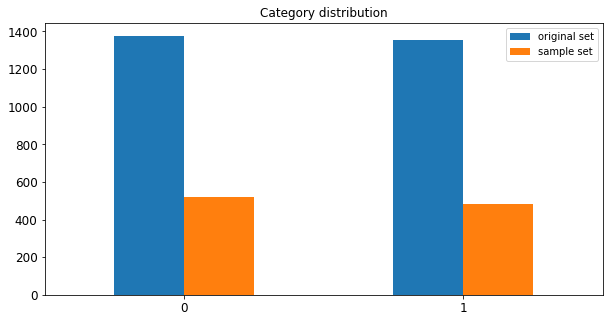

In [170]:
x = list(df2_nodup.score.value_counts())
x_sample = list(df2_sample.score.value_counts())
index = [1, 0]
df_bar = pd.DataFrame({'original set':x, 'sample set':x_sample})
df_bar.plot(kind = 'bar',
       title = 'Category distribution', 
       rot = 0, fontsize = 12, figsize = (10,5))

Class distribution is similar before and after sampling.

- 5.2 Feature Creation

In [171]:
df2_nodup['unigrams'] = df2_nodup['sentence'].apply(lambda x: dmh.tokenize_text(x))

C:\Users\Lin Guan Ting\Anaconda3\envs\DLenv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [172]:
df2_nodup.head()

,sentence,score,unigrams
0,"A very, very, very slow-moving, aimless movie ...",0,"[A, very, ,, very, ,, very, slow-moving, ,, ai..."
1,Not sure who was more lost - the flat characte...,0,"[Not, sure, who, was, more, lost, -, the, flat..."
2,Attempting artiness with black & white and cle...,0,"[Attempting, artiness, with, black, &, white, ..."
3,Very little music or anything to speak of.,0,"[Very, little, music, or, anything, to, speak,..."
4,The best scene in the movie was when Gerardo i...,1,"[The, best, scene, in, the, movie, was, when, ..."


- 5.3 Feature Subset Selection

In [173]:
count_vect = CountVectorizer(stop_words='english')
X_counts = count_vect.fit_transform(df2_nodup.sentence)
print(X_counts.shape)
count_vect.get_feature_names()[0:10]

(2731, 4896)


['00', '10', '100', '11', '12', '13', '15', '15g', '15pm', '17']

In [174]:
analyze = count_vect.build_analyzer()
analyze(' '.join(list(df2_nodup[0:1].sentence)))

['slow',
 'moving',
 'aimless',
 'movie',
 'distressed',
 'drifting',
 'young',
 'man']

In [175]:
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names()]
plot_y = ["doc_"+ str(i) for i in list(df2_nodup.index)]
plot_z = X_counts[:, :].toarray()
df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
df_todraw

,term_00,term_10,term_100,term_11,term_12,term_13,term_15,term_15g,term_15pm,term_17,...,term_yucky,term_yukon,term_yum,term_yummy,term_yun,term_z500a,term_zero,term_zillion,term_zombie,term_zombiez
doc_0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
doc_1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
doc_2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
doc_3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
doc_4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
doc_995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
doc_996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
doc_997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
doc_998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
plt.subplots(figsize=(15, 12))
ax = sns.heatmap(df_todraw, xticklabels=100, yticklabels=100, robust = True, 
                 cmap="PuRd")

- 5.4 Dimensionality Reduction

In [ ]:
df_reduced = PCA(n_components = 2).fit_transform(X_counts.toarray())
print('PCA n=2:', df_reduced.shape)

In [ ]:
col = ['coral', 'blue']
categories=[0, 1]

# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, category in zip(col, categories):
    xs = df_reduced[df2_nodup['score'] == category].T[0]
    ys = df_reduced[df2_nodup['score'] == category].T[1]
   
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()


In [ ]:
X_reduced = PCA(n_components = 3).fit_transform(X_counts.toarray())
X_reduced.shape

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure(figsize=(15, 15))
ax=Axes3D(fig)
col = ['coral', 'blue']
for c, category in zip(col, categories):
    xs = X_reduced[df2_nodup['score'] == category].T[0]
    ys = X_reduced[df2_nodup['score'] == category].T[1]
    zs = X_reduced[df2_nodup['score'] == category].T[2]
    ax.scatter3D(xs, ys, zs, c=c)

ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')
ax.view_init(elev=0,azim=0)
plt.title('3D PCA elev=0,azim=0')
plt.show()

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure(figsize=(15, 15))
ax=Axes3D(fig)
col = ['coral', 'blue']
for c, category in zip(col, categories):
    xs = X_reduced[df2_nodup['score'] == category].T[0]
    ys = X_reduced[df2_nodup['score'] == category].T[1]
    zs = X_reduced[df2_nodup['score'] == category].T[2]
    ax.scatter3D(xs, ys, zs, c=c)

ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')
ax.view_init(elev=0,azim=90)
plt.title('3D PCA elev=0,azim=0')
plt.show()

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure(figsize=(15, 15))
ax=Axes3D(fig)
col = ['coral', 'blue']
for c, category in zip(col, categories):
    xs = X_reduced[df2_nodup['score'] == category].T[0]
    ys = X_reduced[df2_nodup['score'] == category].T[1]
    zs = X_reduced[df2_nodup['score'] == category].T[2]
    ax.scatter3D(xs, ys, zs, c=c)

ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')
ax.view_init(elev=45,azim=45)
plt.title('3D PCA elev=0,azim=0')
plt.show()

#### Using frequency feature only, it's hard to find a obvious hyperplane to seperate positive and negative semantic.

- 5.5 Atrribute Transformation / Aggregation

In [ ]:
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))

In [ ]:
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

In [ ]:
df = pd.DataFrame({'term': count_vect.get_feature_names(),'frequency': term_frequencies})
df_reduced = df.query('frequency > 50')
fig = go.Figure([go.Bar(x=df_reduced['term'], y=df_reduced['frequency'])])
# need to set x-axis type to be 'category' or can't show bar
fig.layout.xaxis.type = 'category'
fig.layout.title.text = 'Efficient way to plot frequency-term visualization, frequency threshold = 50' 
fig.show()

#### High frequency words mainly are be verb and prep, but there are some verb occur frequently, such as "love" and "work".

- 5.6 Discretization and Binarization

In [ ]:
mlb = preprocessing.LabelBinarizer()
mlb.fit(df2_nodup.score)
df2_nodup['bin_score'] = mlb.transform(df2_nodup['score']).tolist()
df2_nodup[0:9]

#### Since originally, "score" is binary label, so the output of LabelBinarizer is actually the same.

6. Data Exploration

### 3. Attempt the following tasks on the new dataset

- meaningful new data visualizations

#### Partiion sentences according to their score

In [ ]:
neg_df = df2_nodup[df2_nodup.score==0]
pos_df = df2_nodup[df2_nodup.score==1]
print('negative data:', neg_df.shape)
print('positive data:', pos_df.shape)

In [ ]:
count_vect = CountVectorizer()
X_counts_neg = count_vect.fit_transform(neg_df.sentence)
X_counts_pos = count_vect.fit_transform(pos_df.sentence)

#### convert positive/ negative groups of sentences to a long string text, so that we can do further visualization about word occurance.

In [ ]:
neg = ''
for i in range(0, neg_df.shape[0]):
    neg += neg_df.sentence.iloc[i]
pos = ''
for i in range(0, pos_df.shape[0]):
    pos += pos_df.sentence.iloc[i]

A long sentence that contains all the sentences in negative group

In [ ]:
neg

#### Use wordcloud library and function *plot_word_cloud* to plot the nice visualization about which words are frequently present in negative/ positive sentence group.

* negative word cloud

In [ ]:
from helpers.text_analysis import plot_word_cloud
plot_word_cloud(neg)

* positive word cloud

In [ ]:
plot_word_cloud(pos)

#### The result is quiet straight-forward to explain. Top frequent words are:
* For negative sentence: bad, movie, film, worst
* For positive sentence: good, great, well, movie <br />
both negative and positive sentence have "movie" for high-frequency word, I think this is because there are too many "movie" used in imdb dataset, so it is reasonable.

- TF-IDF features

In [ ]:
# Create TD-IDF model
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(
    lowercase=True, 
    stop_words='english', 
    strip_accents='ascii'
)
word_counts_tfidf = vectorizer.fit_transform(df2_nodup.sentence)

In [ ]:
word_counts_reduced = PCA(n_components = 3).fit_transform(word_counts_tfidf.toarray())

scores = [0, 1]

# 3d plot based on score
fig=plt.figure(figsize=(15, 15))
ax=Axes3D(fig)
col = ['coral', 'blue']
for c, category in zip(col, categories):
    xs = word_counts_reduced[df2_nodup['score'] == category].T[0]
    ys = word_counts_reduced[df2_nodup['score'] == category].T[1]
    zs = word_counts_reduced[df2_nodup['score'] == category].T[2]
    ax.scatter3D(xs, ys, zs, c=c)

ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')
ax.view_init(elev=45,azim=150)
plt.show()

- Naive Bayes classifier
- Implement a simple Naive Bayes classifier that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, GaussianNB

* why choosing multinomialNB? <br />
scikit-learn implements three naive Bayes variants based on the same number of different probabilistic distributions: Bernoulli, multinomial, and Gaussian. The first one is a binary distribution useful when a feature can be present or absent. The second one is a discrete distribution used **whenever a feature must be represented by a whole number (for example, in natural language processing, it can be the frequency of a term)**, while the latter is a continuous distribution characterized by its mean and variance.


#### For word frequency feature

In [ ]:
mnb = MultinomialNB()
xtrain, xtest, ytrain, ytest = train_test_split(
    X_counts.toarray(), df2_nodup.score, test_size=0.2, random_state=1)
mnb.fit(xtrain, ytrain)
print('training acc:', mnb.score(xtrain, ytrain))
print('testing acc:', mnb.score(xtest, ytest))

#### For tf-idf feature

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(
    word_counts_tfidf.toarray(), df2_nodup.score, test_size=0.2, random_state=1)
mnb.fit(xtrain, ytrain)
print('training acc:', mnb.score(xtrain, ytrain))
print('testing acc:', mnb.score(xtest, ytest))

* Difference between tf-idf and word frequency feature: the results showed that tf-idf (0.83) perform better than word frequency feature (0.81) because tf-idf reduce the weight if word occurs in lots of document, so we can focus on some words that occur infrequently but crucial for classification.


### 4. What are those inefficent parts you noticed? 

* In *DM2020-Lab1-Master.ipynb*, we spent a lot of time on plotting the heatmap of document v.s term frequency, and the plot is very sparse. If we hope to measure entire document and term, it is hard to see meaningful insight because there are too many tags squeeze in one heatmap.
* I think we can plot a more insightful heatmap by following methods:
    1. Do thresholding, such as cutting too low or too high terms, since they may contain less meaning.
    2. When using sns.heatmap(), we it's hard to have nice visualization due to the extreme frequency. It can be allivated by setting parameter *robust = True* <br />
[robust] bool, optional
If True and vmin or vmax are absent, the colormap range is computed with robust quantiles instead of the extreme values.
    3. When counting term frequency, we can first eliminate stop words
``````
count_vect = CountVectorizer(stop_words = 'english')
X_counts = count_vect.fit_transform(X.text)
``````

* More efficient approach to calculate term frequency <br />
In *DM2020-Lab1-Master.ipynb*, we use a for loop and append to build *term_frequencies*, which is a 1D vector. However, this operation spent a lot of time. <br />
By using matrix-wise summation, we can save plenty of time to computer *term_frequencies*

In [ ]:
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))

In [ ]:
term_frequencies

#### My method to improve efficiency, much faster than previous one.

In [ ]:
np.sum(X_counts, axis=0)

### 5. Tidy up your notebook and add minimal comments where needed. This part is worth 10% of your grade.

I keep my comment meaningful and use markdown to make it clear, Thank you so much TAs.